# Model Comparison Test

This notebook compares model predictions with ground truth labels to evaluate final model performance.

## Overview
- **Goal**: Evaluate model performance by comparing predictions with actual labels
- **Predictions**: `dataset/validation_data.csv` (model predictions)
- **Ground Truth**: `dataset/validation_data_with_labels.csv` (actual labels)
- **Output**: Comprehensive performance metrics, visualizations, and error analysis


## 1. Setup and Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully!")


✓ Libraries imported successfully!


## 2. Load Data

Load both the predictions file and the ground truth labels file.


In [2]:
# Load predictions (model output)
predictions_df = pd.read_csv('../dataset/validation_data.csv')
print("📊 PREDICTIONS DATA:")
print(f"   Shape: {predictions_df.shape}")
print(f"   Columns: {predictions_df.columns.tolist()}")
print(f"   Label distribution:")
print(predictions_df['label'].value_counts().sort_index())
print()

# Load ground truth labels
ground_truth_df = pd.read_csv('../dataset/validation_data_with_labels.csv')
print("📊 GROUND TRUTH DATA:")
print(f"   Shape: {ground_truth_df.shape}")
print(f"   Columns: {ground_truth_df.columns.tolist()}")
print(f"   Label distribution:")
print(ground_truth_df['label'].value_counts().sort_index())


📊 PREDICTIONS DATA:
   Shape: (4954, 5)
   Columns: ['label', 'title', 'text', 'subject', 'date']
   Label distribution:
label
0    2987
1    1967
Name: count, dtype: int64

📊 GROUND TRUTH DATA:
   Shape: (4956, 5)
   Columns: ['label', 'title', 'text', 'subject', 'date']
   Label distribution:
label
0    3538
1    1418
Name: count, dtype: int64


## 3. Data Alignment

Ensure both datasets are aligned correctly and have the same structure.


In [3]:
# Verify both datasets have the same number of rows
if len(predictions_df) != len(ground_truth_df):
    print(f"⚠️  WARNING: Row count mismatch!")
    print(f"   Predictions: {len(predictions_df)} rows")
    print(f"   Ground Truth: {len(ground_truth_df)} rows")
    print("   Using minimum length for comparison")
    min_len = min(len(predictions_df), len(ground_truth_df))
    predictions_df = predictions_df.head(min_len)
    ground_truth_df = ground_truth_df.head(min_len)
else:
    print(f"✓ Both datasets have {len(predictions_df)} rows")

# Extract labels
y_pred = predictions_df['label'].values
y_true = ground_truth_df['label'].values

# Verify label values are valid (0 or 1)
print(f"\n✓ Predictions range: {y_pred.min()} to {y_pred.max()}")
print(f"✓ Ground truth range: {y_true.min()} to {y_true.max()}")

# Check for any NaN values
if np.isnan(y_pred).any() or np.isnan(y_true).any():
    print("⚠️  WARNING: NaN values found in labels!")
    # Remove rows with NaN
    valid_mask = ~(np.isnan(y_pred) | np.isnan(y_true))
    y_pred = y_pred[valid_mask]
    y_true = y_true[valid_mask]
    print(f"   Using {len(y_pred)} valid rows after removing NaN")
else:
    print("✓ No NaN values found")

print(f"\n✅ Data alignment complete: {len(y_pred)} samples ready for comparison")


⚠️  WARNING: Row count mismatch!
   Predictions: 4954 rows
   Ground Truth: 4956 rows
   Using minimum length for comparison

✓ Predictions range: 0 to 1
✓ Ground truth range: 0 to 1
✓ No NaN values found

✅ Data alignment complete: 4954 samples ready for comparison


## 4. Calculate Performance Metrics

Calculate comprehensive performance metrics including accuracy, precision, recall, F1-score, and confusion matrix.


In [4]:
# Calculate basic metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average=None)  # Per class
recall = recall_score(y_true, y_pred, average=None)  # Per class
f1 = f1_score(y_true, y_pred, average=None)  # Per class

# Macro averages
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Classification report
class_report = classification_report(y_true, y_pred, target_names=['Fake (0)', 'Real (1)'])

print("=" * 70)
print("📈 MODEL PERFORMANCE METRICS")
print("=" * 70)
print(f"\n🎯 Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"\n📊 Per-Class Metrics:")
print(f"   Class 'Fake' (0):")
print(f"      Precision: {precision[0]:.4f}")
print(f"      Recall:    {recall[0]:.4f}")
print(f"      F1-Score:  {f1[0]:.4f}")
print(f"   Class 'Real' (1):")
print(f"      Precision: {precision[1]:.4f}")
print(f"      Recall:    {recall[1]:.4f}")
print(f"      F1-Score:  {f1[1]:.4f}")
print(f"\n📈 Macro Averages:")
print(f"   Precision: {precision_macro:.4f}")
print(f"   Recall:    {recall_macro:.4f}")
print(f"   F1-Score:  {f1_macro:.4f}")
print(f"\n📋 Confusion Matrix:")
print(f"   True Negatives (TN):  {cm[0, 0]:,}  |  False Positives (FP): {cm[0, 1]:,}")
print(f"   False Negatives (FN): {cm[1, 0]:,}  |  True Positives (TP):  {cm[1, 1]:,}")
print(f"\n📄 Classification Report:")
print(class_report)


📈 MODEL PERFORMANCE METRICS

🎯 Overall Accuracy: 0.8835 (88.35%)

📊 Per-Class Metrics:
   Class 'Fake' (0):
      Precision: 0.9953
      Recall:    0.8408
      F1-Score:  0.9115
   Class 'Real' (1):
      Precision: 0.7138
      Recall:    0.9901
      F1-Score:  0.8295

📈 Macro Averages:
   Precision: 0.8545
   Recall:    0.9155
   F1-Score:  0.8705

📋 Confusion Matrix:
   True Negatives (TN):  2,973  |  False Positives (FP): 563
   False Negatives (FN): 14  |  True Positives (TP):  1,404

📄 Classification Report:
              precision    recall  f1-score   support

    Fake (0)       1.00      0.84      0.91      3536
    Real (1)       0.71      0.99      0.83      1418

    accuracy                           0.88      4954
   macro avg       0.85      0.92      0.87      4954
weighted avg       0.91      0.88      0.89      4954



## 5. Visualizations

Create visualizations to better understand model performance.


✓ Visualizations saved to ../outputs/model_comparison_analysis.png


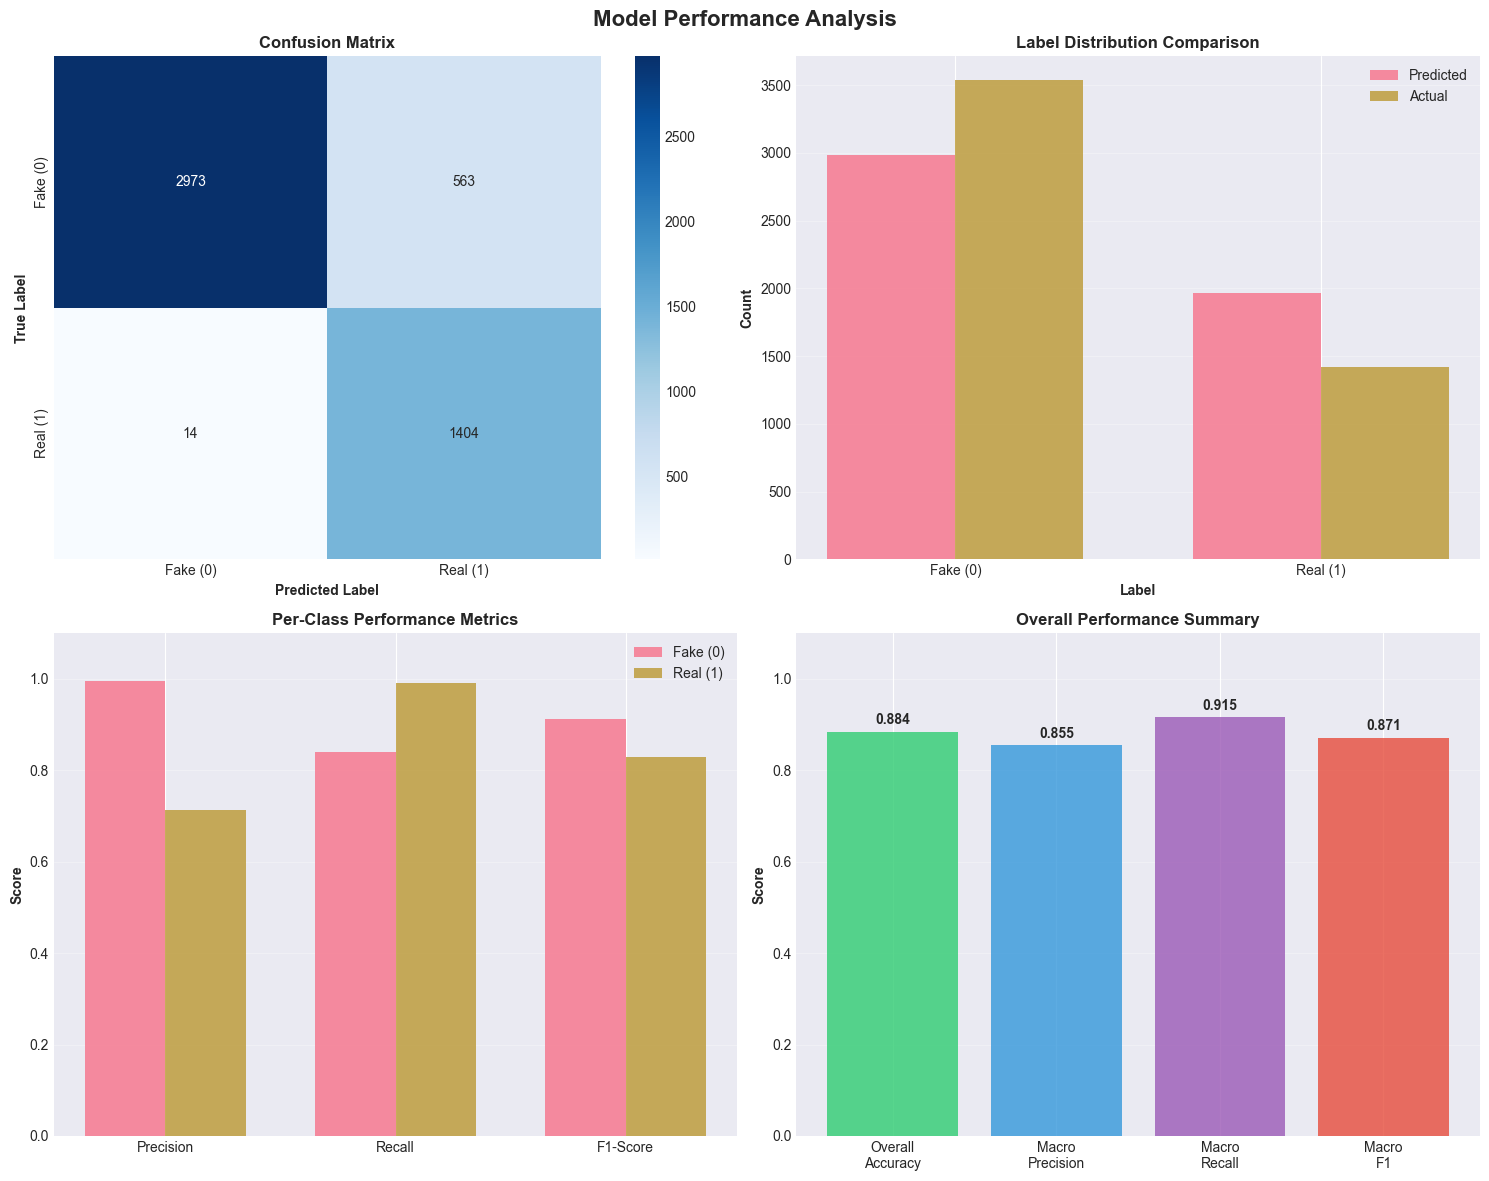

In [5]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Analysis', fontsize=16, fontweight='bold')

# 1. Confusion Matrix Heatmap
ax1 = axes[0, 0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Fake (0)', 'Real (1)'],
            yticklabels=['Fake (0)', 'Real (1)'])
ax1.set_title('Confusion Matrix', fontweight='bold')
ax1.set_ylabel('True Label', fontweight='bold')
ax1.set_xlabel('Predicted Label', fontweight='bold')

# 2. Label Distribution Comparison
ax2 = axes[0, 1]
pred_counts = pd.Series(y_pred).value_counts().sort_index()
true_counts = pd.Series(y_true).value_counts().sort_index()
x = np.arange(len(['Fake (0)', 'Real (1)']))
width = 0.35
ax2.bar(x - width/2, [pred_counts[0], pred_counts[1]], width, label='Predicted', alpha=0.8)
ax2.bar(x + width/2, [true_counts[0], true_counts[1]], width, label='Actual', alpha=0.8)
ax2.set_title('Label Distribution Comparison', fontweight='bold')
ax2.set_ylabel('Count', fontweight='bold')
ax2.set_xlabel('Label', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(['Fake (0)', 'Real (1)'])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. Per-Class Performance Metrics
ax3 = axes[1, 0]
metrics_data = {
    'Fake (0)': [precision[0], recall[0], f1[0]],
    'Real (1)': [precision[1], recall[1], f1[1]]
}
x = np.arange(len(['Precision', 'Recall', 'F1-Score']))
width = 0.35
ax3.bar(x - width/2, metrics_data['Fake (0)'], width, label='Fake (0)', alpha=0.8)
ax3.bar(x + width/2, metrics_data['Real (1)'], width, label='Real (1)', alpha=0.8)
ax3.set_title('Per-Class Performance Metrics', fontweight='bold')
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(['Precision', 'Recall', 'F1-Score'])
ax3.legend()
ax3.set_ylim([0, 1.1])
ax3.grid(axis='y', alpha=0.3)

# 4. Accuracy Summary
ax4 = axes[1, 1]
categories = ['Overall\nAccuracy', 'Macro\nPrecision', 'Macro\nRecall', 'Macro\nF1']
values = [accuracy, precision_macro, recall_macro, f1_macro]
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']
bars = ax4.bar(categories, values, color=colors, alpha=0.8)
ax4.set_title('Overall Performance Summary', fontweight='bold')
ax4.set_ylabel('Score', fontweight='bold')
ax4.set_ylim([0, 1.1])
ax4.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/model_comparison_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved to ../outputs/model_comparison_analysis.png")
plt.show()


## 6. Error Analysis

Identify and analyze misclassified examples to understand model weaknesses.


In [6]:
# Identify misclassified examples
misclassified_mask = y_pred != y_true
misclassified_indices = np.where(misclassified_mask)[0]

print("=" * 70)
print("🔍 ERROR ANALYSIS")
print("=" * 70)
print(f"\nTotal misclassified samples: {len(misclassified_indices):,} ({len(misclassified_indices)/len(y_pred)*100:.2f}%)")

# Categorize errors
false_positives = np.where((y_true == 0) & (y_pred == 1))[0]  # Predicted Real, actually Fake
false_negatives = np.where((y_true == 1) & (y_pred == 0))[0]  # Predicted Fake, actually Real

print(f"\n📊 Error Breakdown:")
print(f"   False Positives (Predicted Real, Actually Fake): {len(false_positives):,}")
print(f"   False Negatives (Predicted Fake, Actually Real):   {len(false_negatives):,}")

# Create error analysis dataframe
error_df = pd.DataFrame({
    'index': misclassified_indices,
    'true_label': y_true[misclassified_indices],
    'predicted_label': y_pred[misclassified_indices],
    'error_type': ['FP' if idx in false_positives else 'FN' for idx in misclassified_indices]
})

# Add text information for analysis
error_df = error_df.merge(
    ground_truth_df[['title', 'text', 'subject']].reset_index(),
    left_on='index', right_on='index', how='left'
)

print(f"\n✅ Error analysis complete: {len(error_df)} misclassified samples identified")


🔍 ERROR ANALYSIS

Total misclassified samples: 577 (11.65%)

📊 Error Breakdown:
   False Positives (Predicted Real, Actually Fake): 563
   False Negatives (Predicted Fake, Actually Real):   14

✅ Error analysis complete: 577 misclassified samples identified


### 6.1 False Positives (Predicted Real, Actually Fake)

Examples where the model incorrectly predicted Real news when it was actually Fake.


In [7]:
fp_df = error_df[error_df['error_type'] == 'FP'].head(10)

if len(fp_df) > 0:
    print(f"📋 Sample False Positives (showing {min(5, len(fp_df))} of {len(false_positives)}):")
    print("=" * 70)
    for idx, row in fp_df.head(5).iterrows():
        print(f"\n{idx + 1}. Title: {row['title'][:100]}...")
        print(f"   Subject: {row['subject']}")
        print(f"   Text preview: {str(row['text'])[:150]}...")
        print(f"   True: Fake (0) | Predicted: Real (1)")
else:
    print("✓ No false positives found!")


📋 Sample False Positives (showing 5 of 563):

15. Title: INT’L LEADERS CAN’T HIDE DISRESPECT For Obama At Final G20: Philippines Leader Calls Barack Obama,”S...
   Subject: left-news
   Text preview: International leaders aren t making any secret about their disdain and lack of respect for Obama in his final G20 summit PHILIPPINES   President Barac...
   True: Fake (0) | Predicted: Real (1)

16. Title: AMERICAN UNIVERSITY HIRES Former Islamic Terror Recruiter: “I trust him” [VIDEO]...
   Subject: left-news
   Text preview: 9-11 is a distant memory for liberals George Washington University has hired a former Islamic extremist to work at its center on homeland security   a...
   True: Fake (0) | Predicted: Real (1)

17. Title: HOLY RIGGED ELECTION! Obama Regime Considers Special Declaration To Take Charge Of Elections! [VIDEO...
   Subject: left-news
   Text preview: If the Obama regime is allowed to wrest control of our elections from the states America better get used to the idea of a 

### 6.2 False Negatives (Predicted Fake, Actually Real)

Examples where the model incorrectly predicted Fake news when it was actually Real.


In [8]:
fn_df = error_df[error_df['error_type'] == 'FN'].head(10)

if len(fn_df) > 0:
    print(f"📋 Sample False Negatives (showing {min(5, len(fn_df))} of {len(false_negatives)}):")
    print("=" * 70)
    for idx, row in fn_df.head(5).iterrows():
        print(f"\n{idx + 1}. Title: {row['title'][:100]}...")
        print(f"   Subject: {row['subject']}")
        print(f"   Text preview: {str(row['text'])[:150]}...")
        print(f"   True: Real (1) | Predicted: Fake (0)")
else:
    print("✓ No false negatives found!")


📋 Sample False Negatives (showing 5 of 14):

1. Title: UK police release new image of jogger in London bus mystery...
   Subject: worldnews
   Text preview: LONDON (Reuters) - British police released a new image on Wednesday in a fresh bid to trace a male jogger who appeared to push a woman into the path o...
   True: Real (1) | Predicted: Fake (0)

2. Title: After Irma, a mixed journey home for Florida evacuees...
   Subject: worldnews
   Text preview: ORLANDO, Fla. (Reuters) - After fleeing homes in Hurricane Irma s path several days ago, Florida residents Lee Tinkler and Mercedes Lopez on Tuesday f...
   True: Real (1) | Predicted: Fake (0)

3. Title: Riot police, hooded youths clash in Paris at labor reform protest...
   Subject: worldnews
   Text preview: PARIS (Reuters) - Riot police clashed with hooded youths on the fringe of a protest in central Paris against French President Emmanuel Macron s reform...
   True: Real (1) | Predicted: Fake (0)

4. Title: Roma seek luck and love 

### 6.3 Error Analysis by Subject

Analyze if errors are concentrated in specific subjects.


📊 Errors by Subject:
   left-news: 201 errors (34.8% of all errors)
   Middle-east: 181 errors (31.4% of all errors)
   US_News: 181 errors (31.4% of all errors)
   worldnews: 14 errors (2.4% of all errors)

✓ Error analysis by subject saved to ../outputs/error_analysis_by_subject.png


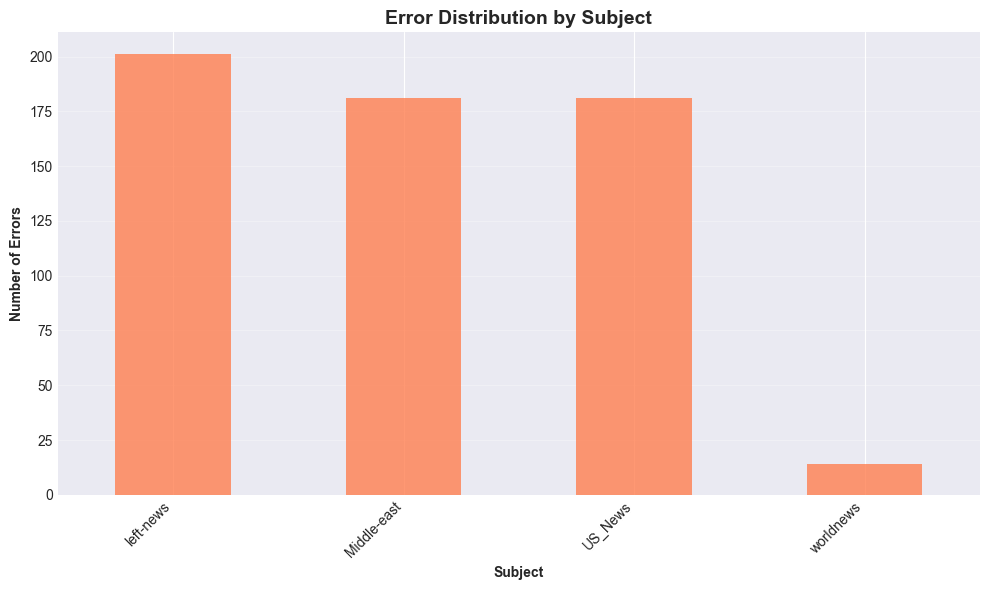

In [9]:
if 'subject' in error_df.columns:
    error_by_subject = error_df.groupby('subject').size().sort_values(ascending=False)
    print("📊 Errors by Subject:")
    print("=" * 70)
    for subject, count in error_by_subject.items():
        pct = (count / len(error_df)) * 100
        print(f"   {subject}: {count:,} errors ({pct:.1f}% of all errors)")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    error_by_subject.plot(kind='bar', color='coral', alpha=0.8)
    plt.title('Error Distribution by Subject', fontweight='bold', fontsize=14)
    plt.xlabel('Subject', fontweight='bold')
    plt.ylabel('Number of Errors', fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../outputs/error_analysis_by_subject.png', dpi=300, bbox_inches='tight')
    print("\n✓ Error analysis by subject saved to ../outputs/error_analysis_by_subject.png")
    plt.show()
else:
    print("⚠️  Subject column not available for analysis")


## 7. Summary Report

Generate a comprehensive summary report of the model evaluation.


In [10]:
from datetime import datetime

# Generate summary report
report = f"""MODEL COMPARISON TEST - FINAL EVALUATION REPORT
{'=' * 70}
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

DATASET INFORMATION
{'-' * 70}
Total Samples: {len(y_pred):,}
Predictions File: dataset/validation_data.csv
Ground Truth File: dataset/validation_data_with_labels.csv

OVERALL PERFORMANCE
{'-' * 70}
Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)

PER-CLASS METRICS
{'-' * 70}
Class 'Fake' (0):
  Precision: {precision[0]:.4f}
  Recall:    {recall[0]:.4f}
  F1-Score:  {f1[0]:.4f}

Class 'Real' (1):
  Precision: {precision[1]:.4f}
  Recall:    {recall[1]:.4f}
  F1-Score:  {f1[1]:.4f}

MACRO AVERAGES
{'-' * 70}
Precision: {precision_macro:.4f}
Recall:    {recall_macro:.4f}
F1-Score:  {f1_macro:.4f}

CONFUSION MATRIX
{'-' * 70}
                Predicted
                Fake (0)  Real (1)
Actual Fake (0)  {cm[0, 0]:6,}  {cm[0, 1]:6,}
      Real (1)    {cm[1, 0]:6,}  {cm[1, 1]:6,}

ERROR ANALYSIS
{'-' * 70}
Total Misclassified: {len(misclassified_indices):,} ({len(misclassified_indices)/len(y_pred)*100:.2f}%)
False Positives (Predicted Real, Actually Fake): {len(false_positives):,}
False Negatives (Predicted Fake, Actually Real):   {len(false_negatives):,}

CLASSIFICATION REPORT
{'-' * 70}
{class_report}

{'=' * 70}
END OF REPORT
"""

print(report)

# Save report to file
report_path = '../outputs/model_comparison_report.txt'
with open(report_path, 'w') as f:
    f.write(report)

print(f"\n✅ Summary report saved to {report_path}")


MODEL COMPARISON TEST - FINAL EVALUATION REPORT
Generated: 2025-11-15 15:22:28

DATASET INFORMATION
----------------------------------------------------------------------
Total Samples: 4,954
Predictions File: dataset/validation_data.csv
Ground Truth File: dataset/validation_data_with_labels.csv

OVERALL PERFORMANCE
----------------------------------------------------------------------
Accuracy: 0.8835 (88.35%)

PER-CLASS METRICS
----------------------------------------------------------------------
Class 'Fake' (0):
  Precision: 0.9953
  Recall:    0.8408
  F1-Score:  0.9115

Class 'Real' (1):
  Precision: 0.7138
  Recall:    0.9901
  F1-Score:  0.8295

MACRO AVERAGES
----------------------------------------------------------------------
Precision: 0.8545
Recall:    0.9155
F1-Score:  0.8705

CONFUSION MATRIX
----------------------------------------------------------------------
                Predicted
                Fake (0)  Real (1)
Actual Fake (0)   2,973     563
      Real (1) 

## Conclusion

This comparison test provides a comprehensive evaluation of the model's performance on the validation dataset. The metrics, visualizations, and error analysis help identify areas where the model performs well and areas that may need improvement.
